Imports and Load Data

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

manifest_path = os.path.join('/Users/ryan.gorzek/Documents/Trachtenberg Lab/Data/Ryan/allen/', 'manifest.json')
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)
sessions = cache.get_session_table()
pv_sessions = sessions[sessions.full_genotype.str.match('Pvalb')]

In [11]:
pv_session_ids = pv_sessions.index.values
# add for loop
curr_session = cache.get_session_data(pv_session_ids[0])

Downloading:   0%|          | 0.00/1.74G [00:00<?, ?B/s]

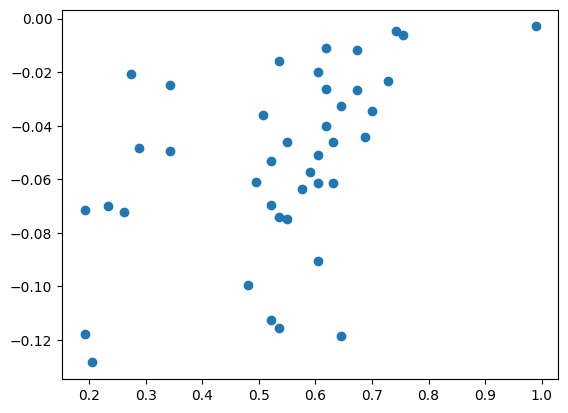

In [88]:
units = curr_session.units
unit_ids = units.index.values
feature_names = ['waveform_duration', 'waveform_amplitude', 'waveform_PT_ratio', 'waveform_repolarization_slope', 'waveform_recovery_slope']
units_sub = units[(units.structure_acronym == 'VISp')
                   & (units.waveform_amplitude < 400)
                   & (units.waveform_PT_ratio < 3)
                   & (units.waveform_recovery_slope > -0.5)]
# units_sub
%matplotlib inline
fig, ax = plt.subplots()
ax.scatter(units_sub[['waveform_duration']], units_sub[['waveform_recovery_slope']])
# for curr_unit in unit_ids:

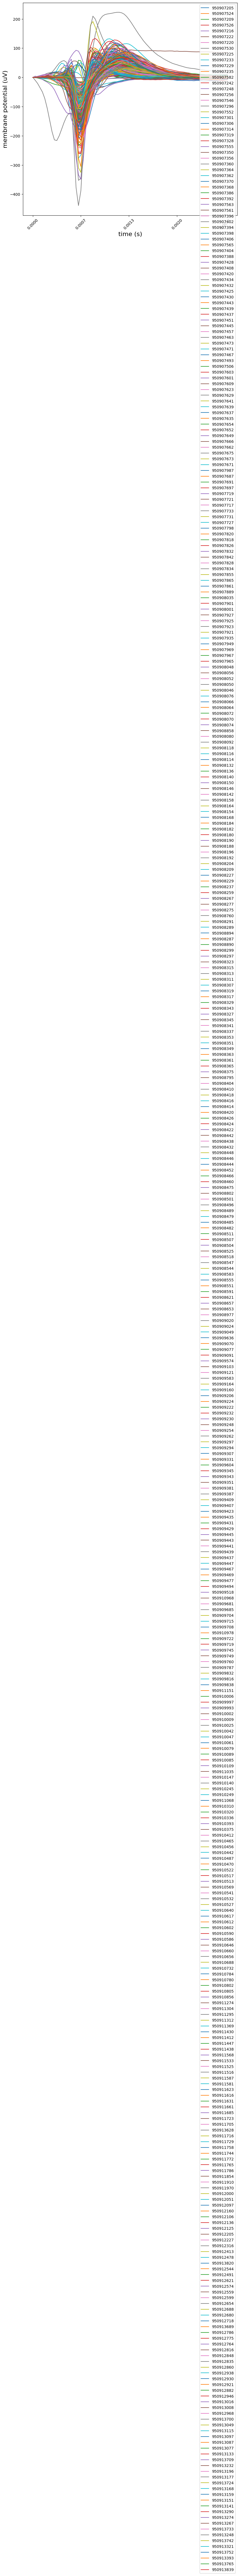

In [99]:
from allensdk.brain_observatory.ecephys.visualization import plot_mean_waveforms

waveforms = {uid: curr_session.mean_waveforms[uid] for uid in unit_ids}
peak_channels = {uid: curr_session.units.loc[uid, 'peak_channel_id'] for uid in unit_ids}

# plot the mean waveform on each unit's peak channel/
plot_mean_waveforms(waveforms, unit_ids, peak_channels)
plt.show()

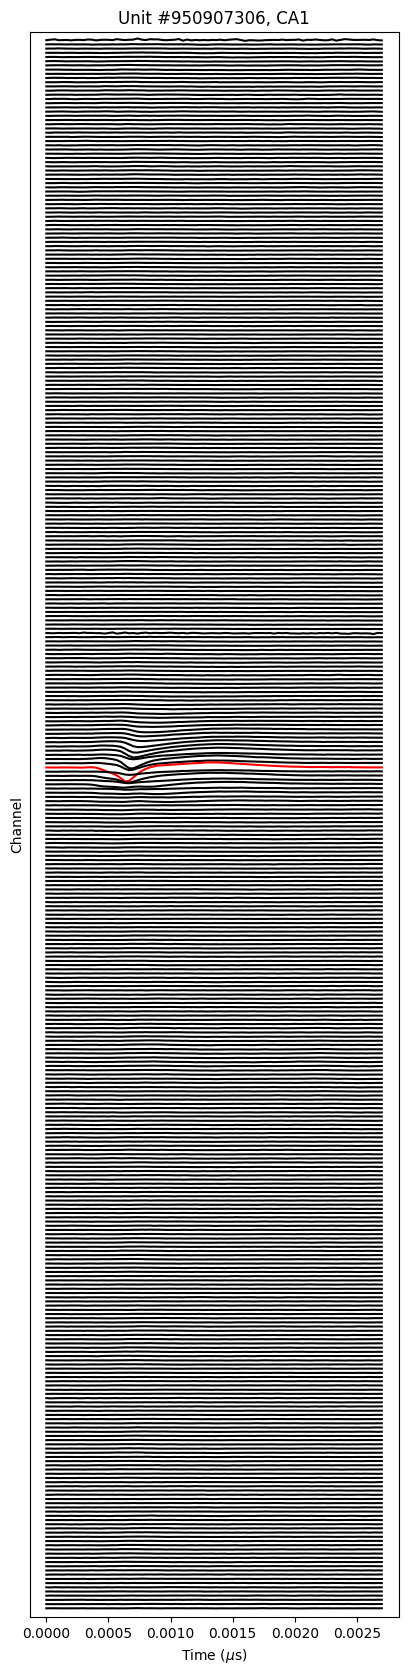

In [192]:
unit_num = 20
channel_ids = np.array(waveforms[unit_ids[unit_num]].channel_id)
fig, ax = plt.subplots()
for channel_num,channel in enumerate(channel_ids):
    t = np.array(waveforms[unit_ids[unit_num]].time)
    V = np.array(waveforms[unit_ids[unit_num]][channel_num,:])
    if channel == units.loc[unit_ids[unit_num],'peak_channel_id']:
        ax.plot(t, V - 20*(channel_num), color='r')
    else:
        ax.plot(t, V - 20*(channel_num), color='k')
ax.set_yticks([])
ax.set_ylim(top=40, bottom=-20*(len(channel_ids)+1))
ax.set_ylabel('Channel')
ax.set_xlabel('Time ($\mu$s)')
ax.set_title('Unit #{un}, {ar}'.format(un=unit_ids[unit_num], ar=units.loc[unit_ids[unit_num],'structure_acronym']))
fig.tight_layout()
fig.set_size_inches(4, 20)

In [188]:
-20*(len(channel_ids)+1)

7480